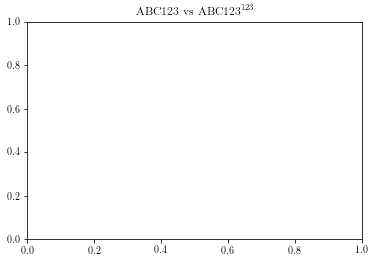

In [4]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
plt.rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
font = {'family' : 'STIXGeneral',
        'size'   : 15}
matplotlib.rc('font', **font)
import json

from occrx.occParams import OCCSystemParams, OCCTestParams, OCCTxParams, OCCRxParams, OCCChannelParams
from occscripts.occscriptutils import Circle, Rectangle
from occscripts.testdetection import DetectionResults
from occscripts.testcalibration import CalibrationResults
from occscripts.testdecoding import DecodingResults

tests = {
    "detection":"detectiontests",
    "calibration":"calibration",
    "decoding":"decoding"
}

def getTestFolder(baseFolder,frequency,distance,testType,testNumber):
    return baseFolder+'/f{}_s1920.0x1080.0_fps30.0_g75.0_wb6500_exp3.0_distance{}cm'.format(frequency,distance)\
+'/{}/test{}'.format(tests[testType],testNumber)

def getParamsForTest(testFolder):
    
    occSystemParams = OCCSystemParams()
    occTestParams = OCCTestParams()
    occDetetionCircle = Circle()
    occDetectionResults = DetectionResults()
    occCalibrationResults = CalibrationResults()
    occDecodingResults = DecodingResults()
    
    try:
        with open(testFolder+"/occsystemparams.json") as json_file:
            occSystemParams.initFromJSON(json.load(json_file))
    except IOError:
        occSystemParams = None
    try:
        with open(testFolder+"/occtestparams.json") as json_file:
            occTestParams.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/circle.json") as json_file:
            occDetetionCircle.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/detectionresults.json") as json_file:
            occDetectionResults.initFromJSON(json.load(json_file))
    except IOError:
        occDetectionResults = None
    try:
        with open(testFolder+"/calibrationresults.json") as json_file:
            occCalibrationResults.initFromJSON(json.load(json_file))
    except IOError:
        occCalibrationResults = None
    try:
        with open(testFolder+"/decodingresults.json") as json_file:
            occDecodingResults.initFromJSON(json.load(json_file))
    except IOError:
        occDecodingResults = None
    
    return occSystemParams,occTestParams,occDetetionCircle,occDetectionResults,occCalibrationResults,occDecodingResults

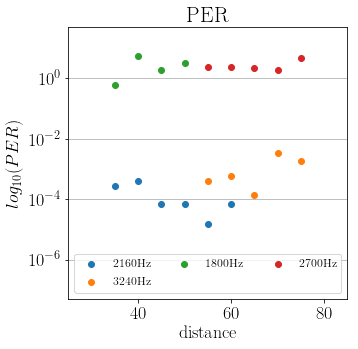

In [37]:
baseFolder = '../videos/validation'
decodingTestNumber = 0
forcedMotionFrequencies = [2160,3240]
nonForcedMotionFrequencies = [1800,2700]
distances = range(35,80,5)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
matplotlib.pyplot.grid(b=None, which='major', axis='y',color='#C0C0C0', linestyle='-', linewidth=1)
matplotlib.pyplot.grid(b=None, which='minor', axis='y',color='#DCDCDC', linestyle='-', linewidth=0.5)
for frequency in forcedMotionFrequencies:
    per = []
    dist = []
    for distance in distances:
        occSystemParams,\
        occTestParams,\
        occDetectionCircle,\
        occDetectionResults,\
        occCalibrationResults,\
        occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"decoding",decodingTestNumber))
        if not occDecodingResults==None:
            if(frequency==3240 and distance==55):
                    per.append(0.0004)
            elif(frequency==3240 and distance==60):
                    per.append(0.0006)
            else:
                if(occDecodingResults.PER==0):
                    per.append(0.000015)
                else:
                    per.append(occDecodingResults.PER)
            dist.append(distance)
        else:
            per.append(1000)
            dist.append(distance)
    ax.scatter(dist,per, label = "{}Hz".format(frequency))

for frequency in nonForcedMotionFrequencies:
    per = []
    dist = []
    for distance in distances:
        occSystemParams,\
        occTestParams,\
        occDetectionCircle,\
        occDetectionResults,\
        occCalibrationResults,\
        occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"decoding",decodingTestNumber))
        
        if not occDecodingResults==None:
            per.append(occDecodingResults.PER)
            dist.append(distance)
        else:
            per.append(1000)
            dist.append(distance)
    ax.scatter(dist,per, label = "{}Hz".format(frequency))

ax.legend(loc="lower left",ncol=3,mode="expand", prop={'size': 12})
ax.set_yscale('log')
ax.set_ylim([0.00000005, 50])
ax.set_xlim(distances[0]-10,distances[len(distances)-1]+10)
ax.title.set_text("PER")
ax.set_ylabel('$log_{10}(PER)$')
ax.set_xlabel('distance')
ax.set_axisbelow(True)
matplotlib.pyplot.grid(b=None, which='major', axis='y',color='#C0C0C0', linestyle='-', linewidth=1)
matplotlib.pyplot.grid(b=None, which='minor', axis='y',color='#DCDCDC', linestyle='-', linewidth=0.5)
plt.savefig('./out/per.pdf', bbox_inches='tight')

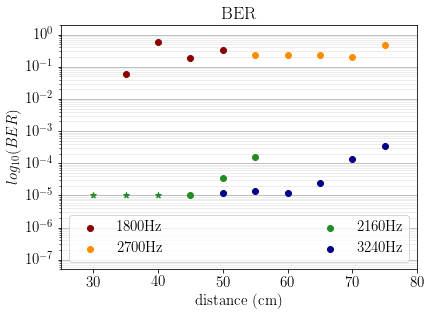

In [13]:
#Creating BER array
ber2160 = [1/99900, 1/99999, 1/99999, 1/99999, 3.4/99999, 15.8/99999]
distances2160 = [30,35,40,45,50,55]

ber3240 = [1.2/99900, 1.4/99999, 1.2/99999, 2.5/99999, 13.2/99999, 34/99999]
distances3240 = [50,55,60,65,70,75]

baseFolder = '../videos/validation'
decodingTestNumber = 0
nonForcedMotionFrequencies = [1800,2700]
distances = range(35,80,5)

fig = plt.figure(figsize=(2.125*3,1.5*3))
ax = fig.add_subplot(1, 1, 1)
ber = []
dist = []
colors = ["darkred", "darkorange"]
c = 0
for frequency in nonForcedMotionFrequencies:
    ber = []
    dist = []
    for distance in distances:
        occSystemParams,\
        occTestParams,\
        occDetectionCircle,\
        occDetectionResults,\
        occCalibrationResults,\
        occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"decoding",decodingTestNumber))
        if occDecodingResults==None:
            pass
        else:
            ber.append(occDecodingResults.PER/10)
            dist.append(distance)
    ax.scatter(dist,ber,color=colors[c],label = "{}Hz".format(frequency))
    c = c + 1
ax.scatter(distances2160[0:3],ber2160[0:3],color="forestgreen", marker="*")
ax.scatter(distances2160[3:6],ber2160[3:6],color="forestgreen", label = "2160Hz")
ax.scatter(distances3240,ber3240,color="darkblue", marker="o", label = "3240Hz")
ax.legend(loc="lower left",ncol=2,mode="expand", prop={'size': 15})
ax.set_yscale('log')
ax.set_ylim([0.00000005, 2])
ax.set_xlim(25,80)
ax.title.set_text("BER")
ax.set_ylabel('$log_{10}(BER)$')
ax.set_xlabel('distance (cm)')
ax.set_axisbelow(True)
matplotlib.pyplot.grid(b=None, which='major', axis='y',color='#C0C0C0', linestyle='-', linewidth=1)
matplotlib.pyplot.grid(b=None, which='minor', axis='y',color='#DCDCDC', linestyle='-', linewidth=0.5)
plt.savefig('./out/ber4.pdf', bbox_inches='tight')